Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Accuracy: 100.00%
Error Rate: 0.00%


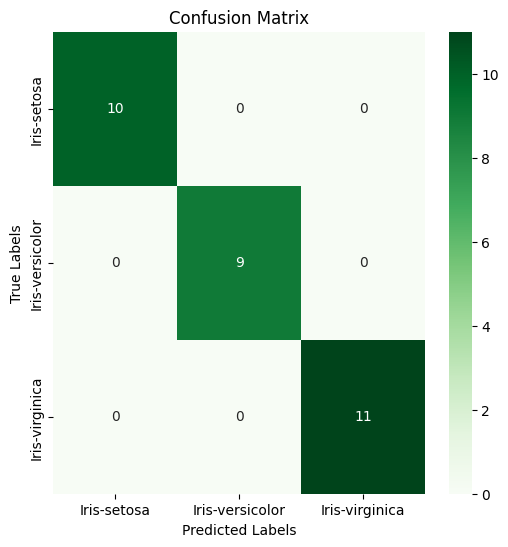

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset from the CSV file
df = pd.read_csv('Iris.csv')
print(df.columns)
X = df.drop('Species', axis=1)
y = df['Species']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb_classifier = GaussianNB()
# Train the model
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
class_report = classification_report(y_test, y_pred)
# Display performance metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Error Rate: {error_rate * 100:.2f}%")
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=df['Species'].unique(), yticklabels=df['Species'].unique())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data = pd.read_csv('decision_data.csv')
print(data.head())
label_column = 'Decision'
data[label_column] = data[label_column].map({'Yes': 1, 'No': 0})
data = data.drop('Day', axis=1)
features = pd.get_dummies(data.drop(label_column, axis=1))
target = data[label_column]
features_train, features_test, target_train, target_test =train_test_split(features, target, test_size=0.3, random_state=42)
nb_classifier = CategoricalNB()
nb_classifier.fit(features_train, target_train)
target_pred = nb_classifier.predict(features_test)
model_accuracy = accuracy_score(target_test, target_pred)
model_error_rate = 1 - model_accuracy
confusion_mat = confusion_matrix(target_test, target_pred)
classification_rep = classification_report(target_test, target_pred,
target_names=['No', 'Yes'])
print("Confusion Matrix:")
print(confusion_mat)
print("\nClassification Report:")
print(classification_rep)
print(f"\nAccuracy: {model_accuracy * 100:.2f}%")
print(f"Error Rate: {model_error_rate * 100:.2f}%")


   Day   Outlook Temp. Humidity    Wind Decision
0    1     Sunny   Hot     High    Weak       No
1    2     Sunny   Hot     High  Strong       No
2    3  Overcast   Hot     High    Weak      Yes
3    4      Rain  Mild     High    Weak      Yes
4    5      Rain  Cool   Normal    Weak      Yes
Confusion Matrix:
[[1 1]
 [1 2]]

Classification Report:
              precision    recall  f1-score   support

          No       0.50      0.50      0.50         2
         Yes       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5


Accuracy: 60.00%
Error Rate: 40.00%
